___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
# IMPORTS HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.seasonal import seasonal_decompose

Using plaidml.keras.backend backend.


In [3]:
import keras.backend as K

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [4]:
# CODE HERE
travel_df = pd.read_csv("UDEMY_TSA_FINAL/Data/Miles_Traveled.csv", index_col='DATE', parse_dates=True)
travel_df.index.freq = 'MS'

In [5]:
travel_df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [6]:
# CODE HERE
travel_df.columns = ['Value']

**TASK: Plot out the time series**

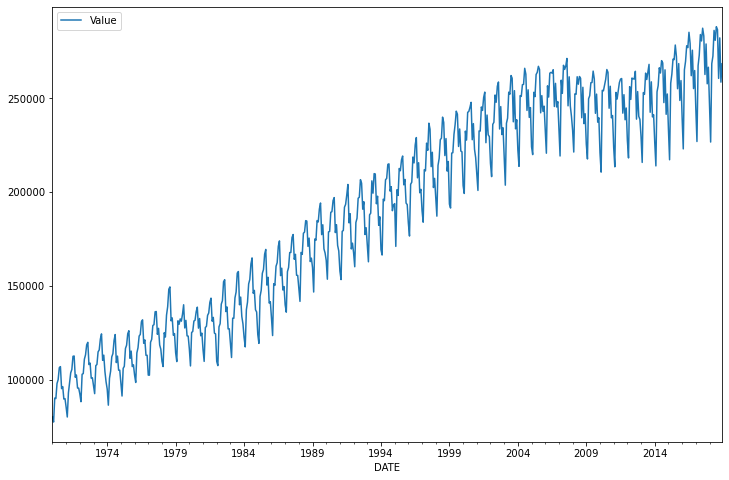

In [8]:
# CODE HERE
travel_df.plot(figsize=(12, 8));

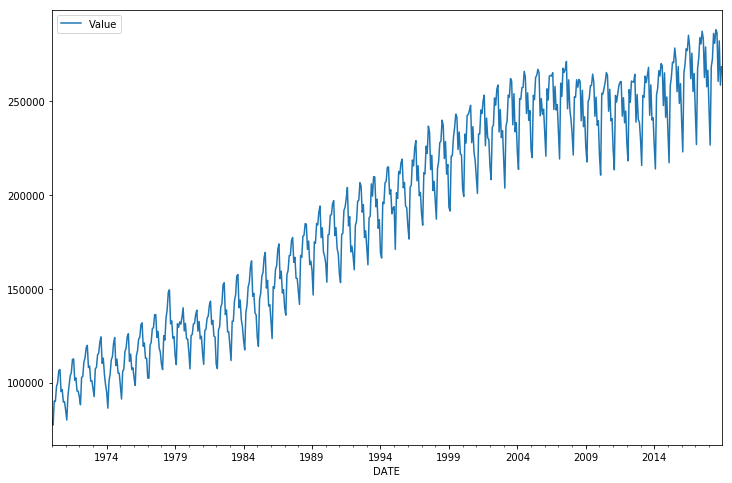

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [9]:
# CODE HERE
ets = seasonal_decompose(travel_df['Value'])

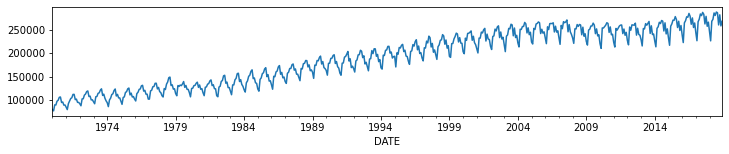

In [10]:
ets.observed.plot(figsize=(12, 2));

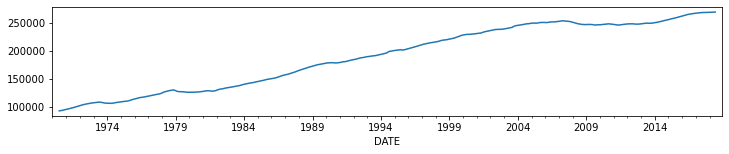

In [11]:
ets.trend.plot(figsize=(12, 2));

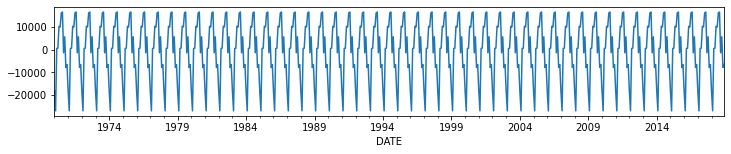

In [12]:
ets.seasonal.plot(figsize=(12, 2));

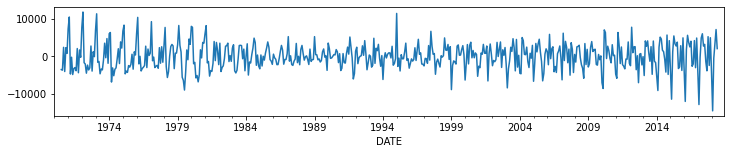

In [13]:
ets.resid.plot(figsize=(12, 2));

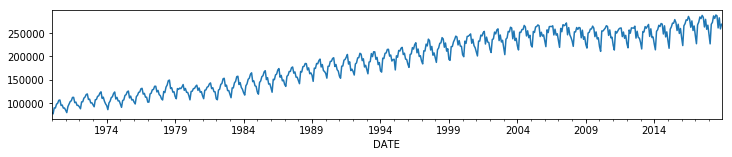

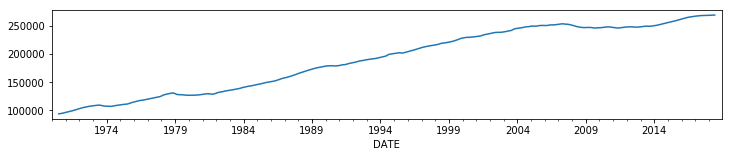

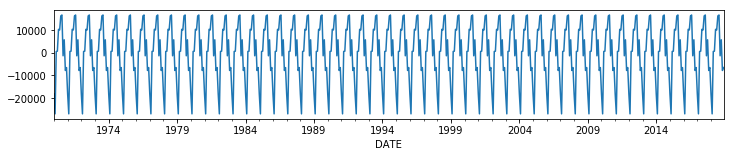

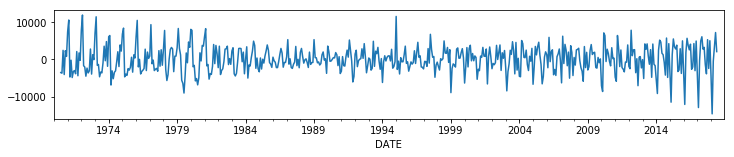

## Train Test Split

**TASK: Figure out the length of the data set**

In [14]:
# CODE HERE
len(travel_df)

588

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [15]:
# CODE HERE
nobs = 12
train = travel_df[:-nobs]
test = travel_df[-nobs:]

In [16]:
len(train)

576

In [17]:
len(test)

12

In [16]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [18]:
# CODE HERE
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [21]:
scaled_test

array([[0.80158265],
       [0.71089704],
       [0.91013382],
       [0.92916661],
       [0.99438307],
       [0.969195  ],
       [1.00382085],
       [0.99649835],
       [0.8725685 ],
       [0.9753741 ],
       [0.86301637],
       [0.90981463]])

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [22]:
#CODE HERE
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [23]:
len(train_generator)

564

Using TensorFlow backend.


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [27]:
#CODE HERE
K._make_rng_state(seed=101)

model = Sequential()

model.add(LSTM(150, input_shape=(n_input, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [37]:
# CODE HERE
model.fit_generator(train_generator, epochs=15)

Epoch 1/15
564/564 [==============================] - 22s 39ms/step - loss: 0.0015
Epoch 2/15
564/564 [==============================] - 30s 53ms/step - loss: 0.0015
Epoch 3/15
564/564 [==============================] - 23s 40ms/step - loss: 0.0014
Epoch 4/15
564/564 [==============================] - 21s 37ms/step - loss: 0.0015
Epoch 5/15
564/564 [==============================] - 23s 41ms/step - loss: 0.0015
Epoch 6/15
564/564 [==============================] - 21s 38ms/step - loss: 0.0014
Epoch 7/15
564/564 [==============================] - 21s 37ms/step - loss: 0.0013
Epoch 8/15
564/564 [==============================] - 23s 41ms/step - loss: 0.0013
Epoch 9/15
564/564 [==============================] - 22s 39ms/step - loss: 0.0013
Epoch 10/15
564/564 [==============================] - 22s 38ms/step - loss: 0.0012
Epoch 11/15
564/564 [==============================] - 21s 36ms/step - loss: 0.0012
Epoch 12/15
564/564 [==============================] - 24s 42ms/step - loss: 0.0012
E

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

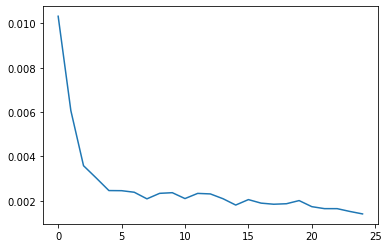

In [29]:
# CODE HERE
loss = model.history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, loss);

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [38]:
# CODE HERE
first_eval_batch = scaled_train[-n_input:]
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

In [39]:
# hold the predictions
test_predictions = []

# last n_input from the training set
first_eval_batch = scaled_train[-n_input:]

# rehsape to format RNN wants (same as TimeseriesGenearator object shape)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [40]:
test_predictions

[array([0.7919371], dtype=float32),
 array([0.77238166], dtype=float32),
 array([0.9015167], dtype=float32),
 array([0.9313235], dtype=float32),
 array([0.9627749], dtype=float32),
 array([0.964226], dtype=float32),
 array([0.9671315], dtype=float32),
 array([0.95199466], dtype=float32),
 array([0.91407645], dtype=float32),
 array([0.9204788], dtype=float32),
 array([0.86572313], dtype=float32),
 array([0.86079466], dtype=float32)]

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [41]:
#CODE HERE
test_predictions = scaler.inverse_transform(test_predictions)

In [42]:
test_predictions

array([[243670.39191556],
       [239565.68351305],
       [266671.25179839],
       [272927.73991156],
       [279529.40857136],
       [279834.00319219],
       [280443.86803186],
       [277266.63060737],
       [269307.56040394],
       [270651.4249649 ],
       [259158.15135813],
       [258123.66064847]])

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [43]:
# CODE HERE
test['Predictions'] = test_predictions
test

<ipython-input-43-3ec83bba6727>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = test_predictions


,Value,Predictions
DATE,,
2018-01-01,245695.0,243670.391916
2018-02-01,226660.0,239565.683513
2018-03-01,268480.0,266671.251798
2018-04-01,272475.0,272927.739912
2018-05-01,286164.0,279529.408571
2018-06-01,280877.0,279834.003192
2018-07-01,288145.0,280443.868032
2018-08-01,286608.0,277266.630607
2018-09-01,260595.0,269307.560404


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

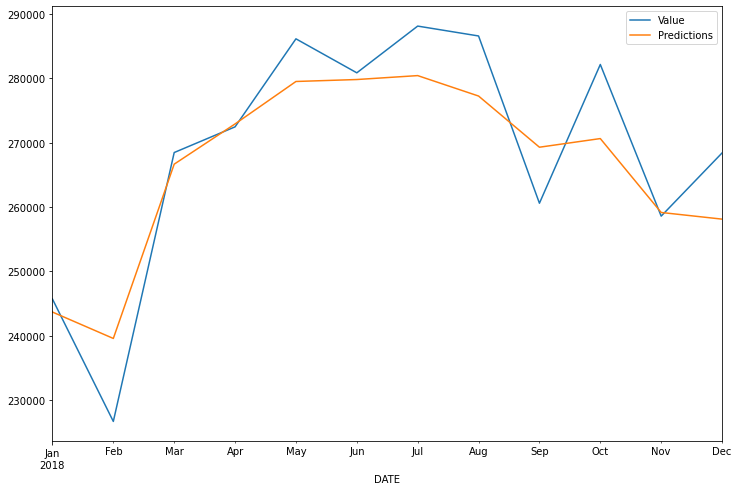

In [44]:
# CODE HERE
test.plot(figsize=(12, 8));

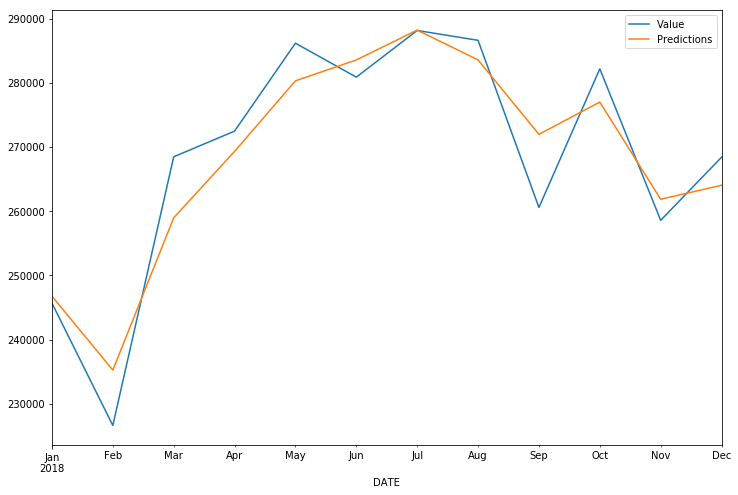

# Saving Models

**TASK: Optional, Save your model!**

In [45]:
model.save('model_forecast.h5')